<a href="https://colab.research.google.com/github/aalonsca73/in_silico_toxicology/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

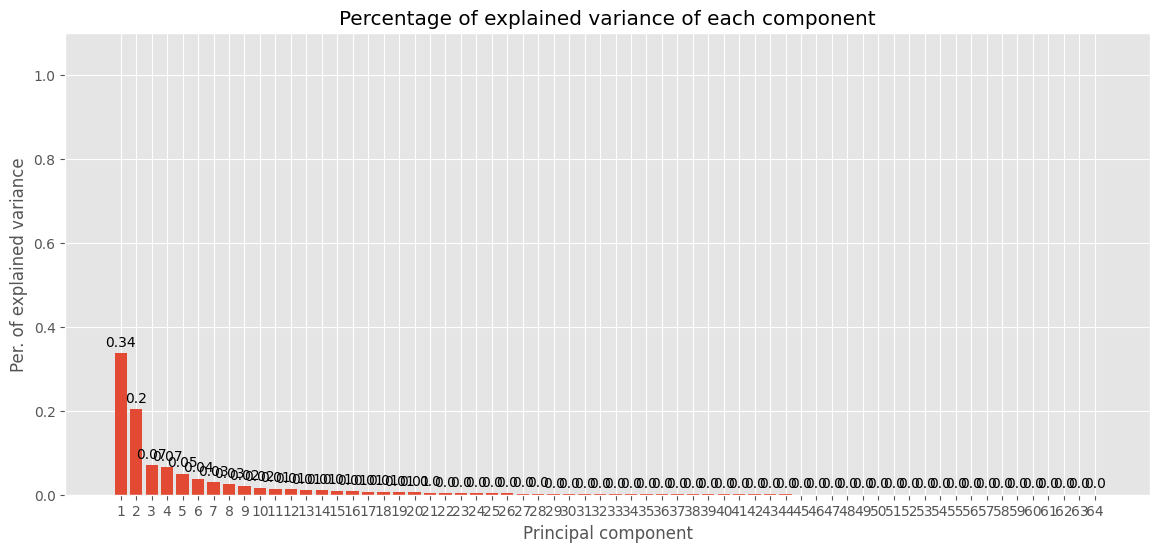

In [35]:
# Define the filename for the CSV file
filename = 'llistes.xlsx'

# Import necessary libraries
# Data treatment
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Graphics
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocessing and modelling
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Read the CSV file using pandas
df = pd.read_csv('molecules_with_properties.csv')
filtered_df = df.loc[:,df.columns != "SMILES"]
filtered_df = filtered_df.set_index('Name')
# Training PCA model with scale of the data
pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(filtered_df)

# Extraction of the trained model from the pipeline
pca_model = pca_pipe.named_steps['pca']

# Convert array to dataframe
PCA = pd.DataFrame(data=pca_model.components_,
                   columns = filtered_df.columns)
# Percentage of explained variance of each component
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.bar(x=np.arange(pca_model.n_components_)+1,
       height = pca_model.explained_variance_ratio_)

for x,y in zip(np.arange(len(filtered_df.columns))+1, pca_model.explained_variance_ratio_):
    label = round(y,2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,5),ha='center')

ax.set_xticks(np.arange(pca_model.n_components_)+1)
ax.set_ylim(0,1.1)
ax.set_title('Percentage of explained variance of each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Per. of explained variance');
